<a href="https://colab.research.google.com/github/ElsaMarku/Smart-Expense-Tracker/blob/main/CEN376_Lab_07_Cluster_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CEN376_Lab_07: Evaluating Clusters**

This lab focuses on evaluating clustering quality using various metrics and techniques.
We will learn:
1. How to quantify clustering quality
2. How to find the optimal number of clusters
3. How to visualize and interpret clustering results
4. How to compare different clustering solutions


## **1. Applying and Visualizing KMeans Clustering**

### **1.1. Applying and Visualizing KMeans Clustering on the Iris Dataset**

**1.Importing Required Libraries**


In [ ]:
import pandas as pd  #call pandas to create a dataframe
from sklearn.cluster import KMeans  #from sklearn we will get kmeans model
from sklearn.decomposition import PCA #dimentionality reduction for visualizatio0n
from matplotlib import pyplot as plt #visualization
import sklearn.metrics as metrics

**2.Getting Data**



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/iris.csv')
data.columns = ['sepal length','sepal width', 'petal length', 'petal width', 'class']
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**3.Preprocessing Data**
- 3.1.Extracting Features
- 3.2. Normalization

In [ ]:
x = data.iloc[:,:-1] #all rows, all col expect the last one
normalized_data = (x - x.min())/(x.max()-x.min())
normalized_data

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


**4.Implement KMeans Clustering**



**Creating the KMeans Algorithm**

A KMeans model is created with the following parameters


In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 50, verbose = 0)

**Fitting Dataset to KMeans Algorithm**

 Runs the KMeans algorithm on the normalized data and predicts the cluster labels for each data point.

In [ ]:
kmeans.fit_predict(normalized_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

**Extracting and Printing Ecaluation Metrics**
: Evaluating Quantitatively

- WCSS OR inertia is KMeans error measurement.

- Within-Cluster Sum of Squares (WCSS) measures the compactness of the clusters.

- Lower WCSS indicates better clustering.

- Key evaluation metric for KMeans.

**How it works:**
 - For each point, calculate distance to its centroid
- Square that distance
- Sum all squared distances

**Formula:** WCSS = Σ (distance from point to its centroid)²

**Explanation**
- **Lower WCSS = Better clustering** (points are tight around centroids)
- **Higher WCSS = Worse clustering** (points are spread out)


In [ ]:
# stores the cluster assignments for each data point
kmeans_labels = kmeans.labels_
print("\nCluster Labels: \n",kmeans_labels)


#gives the coordinates of centroids of the clusters found by Kmeans
centroids = kmeans.cluster_centers_
print("\nCluster Centroids: \n",centroids)


#calculates the within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("\n The total error of clustering is:", wcss)


Cluster Labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

Cluster Centroids: 
 [[0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]

 The total error of clustering is: 6.982216473785235


**4.4. Visualising Clusters**

PCA is a technique used for dimensionality reduction. It transforms high-dimensional data into fewer dimensions (usually 2 or 3) while retaining as much variance (information) as possible.

By reducing the dimensionality, we can visualize the data in a scatter plot and assess the separation of clusters.

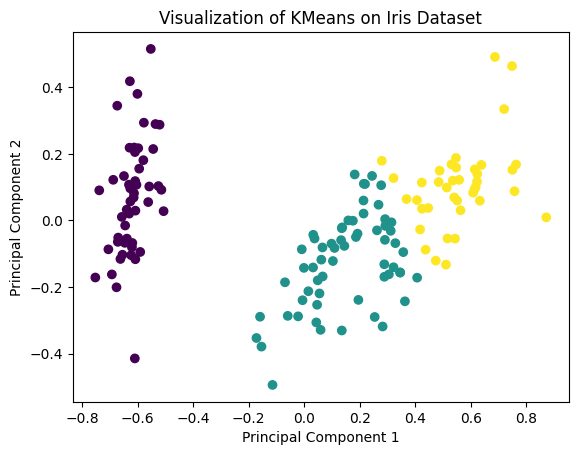

In [ ]:
# Fit the PCA model to Normalized Data
pca = PCA(n_components=2).fit(normalized_data)
pca_2d = pca.transform(normalized_data)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')

plt.title("Visualization of KMeans on Iris Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Adding Labels to Features Dataset
print("\nInitially our Dataset was:\n", x)
x['Cluster_Labels'] = kmeans_labels

#Sorting the dataset by Cluster Lables
x = x.sort_values(by=['Cluster_Labels'])
print("\nOur Dataset After adding Labels to it is:\n", x)


Initially our Dataset was:
      sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

Our Dataset After adding Labels to it is:
      sepal length  sepal width  petal length  petal width  Cluster_Labels
0             5.1          3.5           1.4          0.2               0
1             4.9          3.0           1.4          0.2  

**4.2 Euclidean Distance and Heatmap Visualization**
- euclidean distance matrix calculates the pairwise euclidean distance between all points in the dataset


- heatmap - a visual representation of data where values are shown in colors
  - darker colors represent smaller distances
(points are more similar)
  - brighter colors represent larger distances (points are less similar)

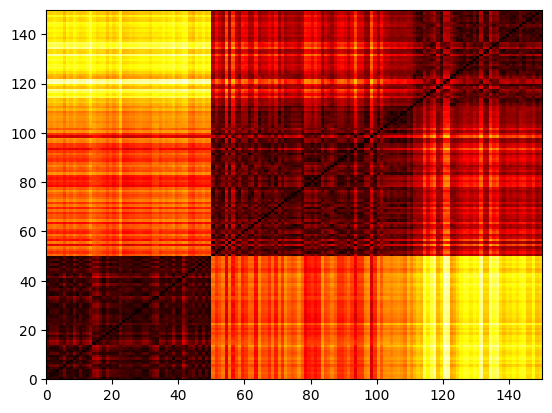

In [ ]:
euclidean_dists = metrics.euclidean_distances(x)
#print(euclidean_dists)
plt.pcolormesh(euclidean_dists, cmap = 'hot')

- The heatmap provides an intuitive way to see how close different data points are.

- If the clusters are well-separated, distinct patterns can be seen, where points within the same cluster are close to each other

**5. Silhouette Score**

**Measures:**
1. How close each point is to others **in its own cluster** (cohesion)
2. How far each point is from points **in other clusters** (separation)

**Range:** -1 to +1
- **+1** = Perfect clustering (point is very close to its cluster, far from others)
- **0** = Point is on the border between clusters
- **-1** = Point is in the wrong cluster

**Average Silhouette Score** for the whole dataset:
- **> 0.7** = Strong clustering
- **0.5 - 0.7** = Reasonable clustering
- **0.25 - 0.5** = Weak clustering
- **< 0.25** = No substantial clustering

**reminder:**
- Silhouette uses distance calculations, so normalization is crucial.
- You need at least 2 clusters to measure separation, k=1 has no meaning.


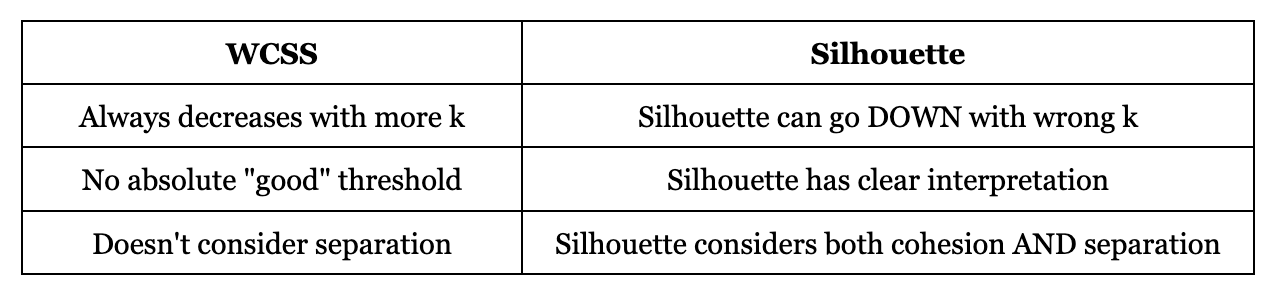

In [ ]:
from sklearn.metrics import silhouette_score

# After fitting KMeans
kmeans = KMeans(n_clusters=3, n_init=50)
kmeans.fit_predict(normalized_data)

# Existing metrics
wcss = kmeans.inertia_
print("WCSS:", wcss)

# NEW: Add Silhouette Score
silhouette_avg = silhouette_score(normalized_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

WCSS: 6.982216473785235
Silhouette Score: 0.5047687565398588


### **1.2. Applying and Visualizing KMeans Clustering on the Glass Dataset**

In [ ]:
# 1.Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

# 2.Getting Data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)
data.columns = ['ID','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
data


,ID,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The total error of clustering is: 18.382320408460792

Cluster Labels: 
 [4 2 2 2 2 0 2 2 2 2 0 2 0 0 2 2 2 4 4 2 0 4 2 2 2 2 2 2 2 2 0 2 0 2 2 2 4
 2 4 4 2 2 2 4 0 2 0 4 4 2 4 0 2 2 2 0 0 2 2 2 2 4 4 4 4 4 0 0 0 4 2 0 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 0 2 2 0 2 0 4 4 1 1 1 1 1 1
 1 1 0 2 2 2 2 0 2 2 0 2 2 2 0 2 0 0 1 1 1 2 0 2 0 0 2 2 2 2 0 0 2 0 0 2 2
 2 2 0 4 2 2 2 2 2 4 2 2 2 0 0 3 2 1 1 1 1 1 1 5 5 1 0 1 2 2 2 2 2 3 1 1 3
 2 2 4 4 4 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3]

Cluster Centroids: 
 [[0.30389596 0.35304511 0.75668151 0.31331776 0.51714286 0.08450081
  0.30710967 0.00801587 0.42696078]
 [0.50909889 0.30553657 0.06357562 0.33120929 0.51282468 0.06536378
  0.62542244 0.04545455 0.13368984]
 [0.26671203 0.37529323 0.76126949 0.35239875 0.53175    0.09080515
  0.27178439 0.00939683 0.02215686]
 [0.22987438 0.59091961 0.04488607 0.59645339 0.59368132 0.02180107
  0.28663855 0.34017094 0.02941176]
 [0.48335528 0.48966165 0.79120267 0.19665109 0.3211309

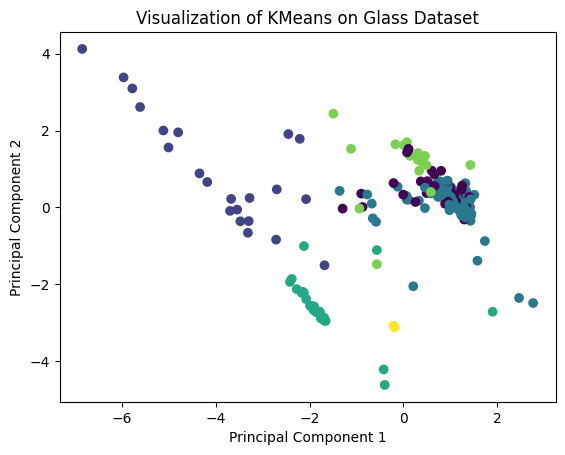


Initially our Dataset was:
      Refractive Index     Na    Mg    Al     Si     K    Ca    Ba   Fe
0             1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1             1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2             1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3             1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4             1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..                ...    ...   ...   ...    ...   ...   ...   ...  ...
209           1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210           1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211           1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212           1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213           1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

Our Dataset After adding Labels to it is:
      Refractive Index     Na    Mg    Al     Si    

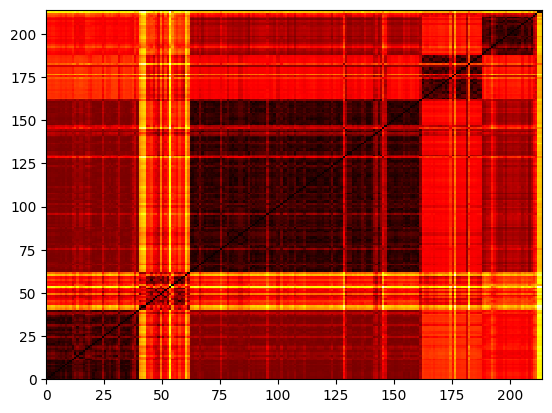

In [ ]:
# 1.Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

# 2.Getting Data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)
data.columns = ['ID','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
data

# 3.Preprocessing Data
# 3.1.Extracting Features
x = data.iloc[:,1:-1]

# 3.2.Normalizing Extracted Features
normalized_data = (x - x.min())/(x.max()-x.min())


# 4.Implement KMeans Clustering

# 4.1.Creating the KMeans Algorithm
kmeans = KMeans(n_clusters = 6, n_init = 50, verbose = 0)

# 4.2.Fitting Dataset to KMeans Algorithm
kmeans.fit_predict(normalized_data)

# 4.3.Extracting and Printing Ecaluation Metrics
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
wcss = kmeans.inertia_

print("The total error of clustering is:", wcss)
print("\nCluster Labels: \n",kmeans_labels)
print("\nCluster Centroids: \n",centroids)

# 4.4. Visualising Clusters

# Fit the PCA model to Data
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')

plt.title("Visualization of KMeans on Glass Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Adding Labels to Features Dataset
print("\nInitially our Dataset was:\n", x)
x['Cluster_Labels'] = kmeans_labels #adding a new column in the dataFrame

#Sorting the dataset by Cluster Lables
x = x.sort_values(by=['Cluster_Labels'])
print("\nOur Dataset After adding Labels to it is:\n", x)

euclidean_dists = metrics.euclidean_distances(x)
#print(euclidean_dists)
plt.pcolormesh(euclidean_dists, cmap = 'hot')

### **1.3. Applying and Visualizing KMeans Clustering on a Dataset with Well Saparated Clusters**

In [ ]:
# 1.Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

# 2.Getting Data
data = pd.read_csv('WellSeparatedClusters.csv')


# 3.Preprocessing Data
# 3.1.Extracting Features (There are no classes)
x = data

# 3.2.Normalizing Extracted Features
normalized_data = (x - x.min())/(x.max()-x.min())


# 4.Implement KMeans Clustering

# 4.1.Creating the KMeans Algorithm
kmeans = KMeans(n_clusters = 5, n_init = 10, verbose = 0)

# 4.2.Fitting Dataset to KMeans Algorithm
kmeans.fit_predict(x)

# 4.3.Extracting and Printing Ecaluation Metrics
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
wcss = kmeans.inertia_

print("The total error of clustering is:", wcss)
print("\nCluster Labels: \n",kmeans_labels)
print("\nCluster Centroids: \n",centroids)

# 4.4. Visualising Clusters
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=kmeans.labels_, cmap='viridis')

plt.title("Visualization of KMeans on Well Separated Dataset")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Adding Labels to Features Dataset
print("\nInitially our Dataset was:\n", x)
x['Cluster_Labels'] = kmeans_labels #adding a new column in the dataFrame

#Sorting the dataset by Cluster Lables
x = x.sort_values(by=['Cluster_Labels'])
print("\nOur Dataset After adding Labels to it is:\n", x)

euclidean_dists = metrics.euclidean_distances(x)
#print(euclidean_dists)
plt.pcolormesh(euclidean_dists, cmap = 'hot')

FileNotFoundError: [Errno 2] No such file or directory: 'WellSeparatedClusters.csv'

## **2. Identifying the Optimum number of Clusters using Elbow Method**

### **2.1. Applying and Visualizing KMeans Clustering on the Iris Dataset**

**Problem: How many clusters should you use?**

***The Elbow Method*** is a popular technique for determining the optimal number of clusters in KMeans.


The basic idea is to :
1. fit KMeans  with different values of k,
2. calculate the WCSS for each value of k,
3. plot k vs. WCSS.

WCSS decreases as k increases bcs as you increase the number of clusters, the points are more likely to be closer to their centroids (since each cluster has fewer data points).


However, at a certain point, increasing k no longer significantly improves the clustering.

The "elbow" in the plot (where the decrease in WCSS starts to slow down) indicates the optimal number of clusters.

Generated errors are:

 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.03998724608725, 34.3424135864136, 29.990426406926424, 27.846782524493065, 26.12807784613048, 24.119653163657823, 22.706331727705305, 21.25563458824346, 20.117773505734043, 18.912415584415587]


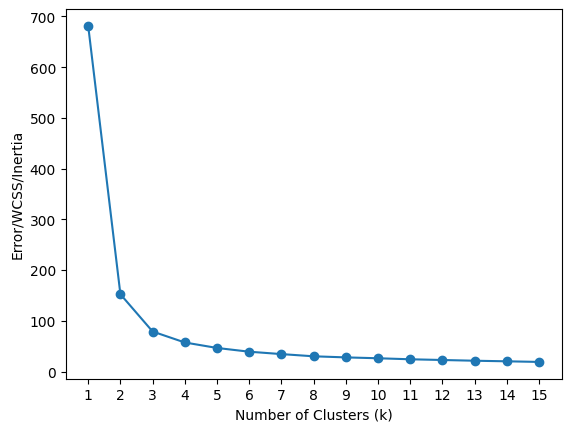

In [ ]:
# 1.Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

# 2.Getting Data
data = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/iris.csv')
data.columns = ['sepal length','sepal width', 'petal length', 'petal width', 'class']

# 3.Preprocessing Data
# 3.1.Extracting Features
x = data.iloc[:,0:4]

# 3.2.Normalizing Extracted Features
normalized_data = (x - x.min())/(x.max()-x.min())


# 4.Implement KMeans Clustering

# 4.1. Identifying the optimum number of clusters (Elbow Method)
minNumClusters = 1
maxNumClusters = 15
wcss = [] #empty list to store the wcss values for each value of k

for k in range(minNumClusters, maxNumClusters+1):
  kmeans = KMeans(n_clusters = k, n_init = 50)  #create a model
  kmeans.fit_predict(x)     #fit model
  wcss.append(kmeans.inertia_)   #store wcss value for k

print("Generated errors are:\n\n",wcss)

# 4.2. Visualizing Errors vs Numbers of Clusters
fig, ax = plt.subplots()
ax.plot(range(minNumClusters, maxNumClusters+1), wcss, '-o')
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Error/WCSS/Inertia")
ax.set_xticks(range(minNumClusters, maxNumClusters+1))
plt.show()



 The total error of clustering is: 6.982216473785235 

 


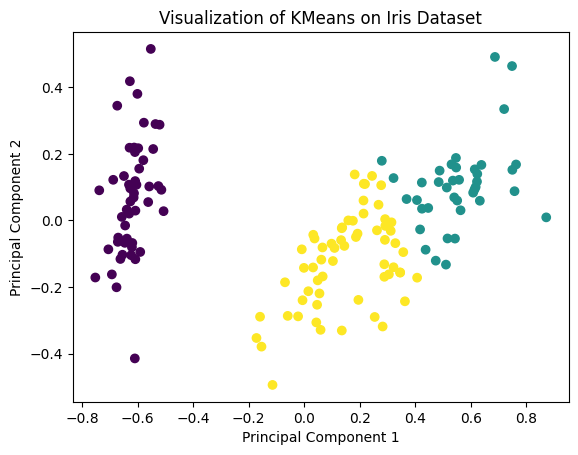

In [ ]:
# 4.3.Creating the KMeans Algorithm with Optimum Number of Clusters
kmeans = KMeans(n_clusters = 3, n_init = 50, verbose = 0)

# 4.4.Fitting Dataset to KMeans Algorithm
kmeans.fit_predict(normalized_data)

# 4.5. Visualising Clusters

# Fit the PCA model to Normalized Data
pca = PCA(n_components=2).fit(normalized_data)
pca_2d = pca.transform(normalized_data)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')

print("\n The total error of clustering is:", kmeans.inertia_ ,"\n\n ")

plt.title("Visualization of KMeans on Iris Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Silhouette**

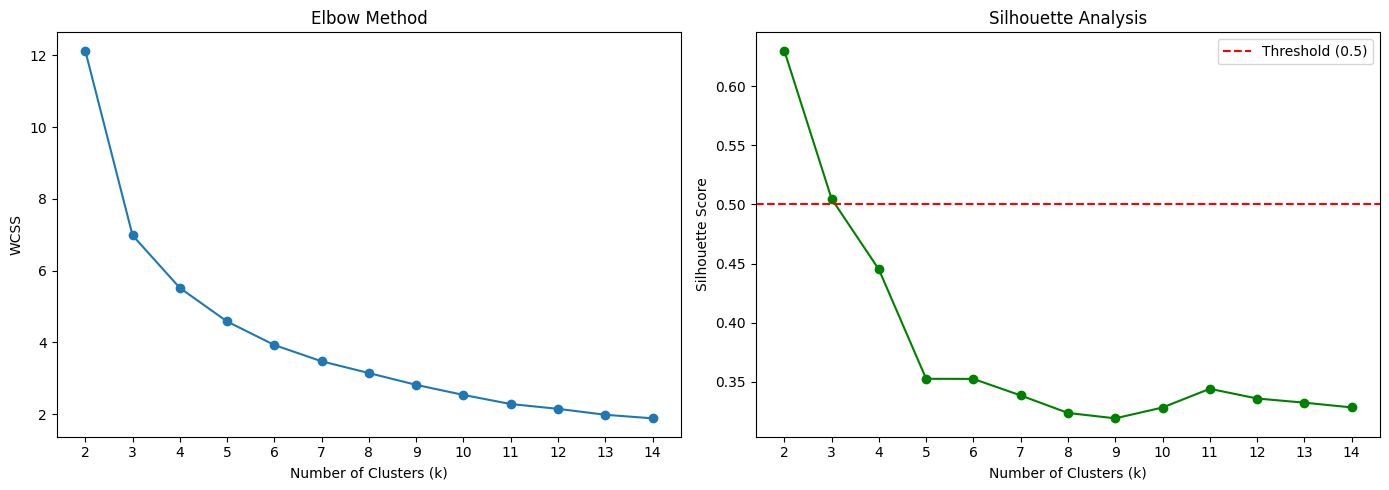


Best k by Silhouette Score: 2
Silhouette Score at k=2: 0.630


In [ ]:
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for k in range(2, 15):  # Note: k starts at 2 (silhouette needs ≥2 clusters)
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(normalized_data)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, labels))

# Plot both metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# WCSS plot
ax1.plot(range(2, 15), wcss, '-o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method')
ax1.set_xticks(range(2, 15))

# Silhouette plot
ax2.plot(range(2, 15), silhouette_scores, '-o', color='green')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.set_xticks(range(2, 15))
ax2.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
ax2.legend()

plt.tight_layout()
plt.show()

# Find best k
best_k = range(2, 15)[silhouette_scores.index(max(silhouette_scores))]
print(f"\nBest k by Silhouette Score: {best_k}")
print(f"Silhouette Score at k={best_k}: {max(silhouette_scores):.3f}")

### **2.2. Applying and Visualizing KMeans Clustering on the Glass Dataset**

In [ ]:
# 1.Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

# 2.Getting Data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)
data.columns = ['ID', 'Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# 3.Preprocessing Data
# 3.1.Extracting Features
x = data.iloc[:,1:11]

# 3.2.Normalizing Extracted Features
normalized_data = (x - x.min())/(x.max()-x.min())


# 4.Implement KMeans Clustering

# 4.1. Identifying the optimum number of clusters (Elbow Method)
minNumClusters = 1
maxNumClusters = 10
wcss = [] #Errorr

for k in range(minNumClusters, maxNumClusters+1):
  kmeans = KMeans(n_clusters = k, n_init = 50)
  kmeans.fit_predict(normalized_data)
  wcss.append(kmeans.inertia_)

print("Generated errors are:\n",wcss)

# 4.2. Visualizing Errors vs Numbers of Clusters
fig, ax = plt.subplots()
ax.plot(range(minNumClusters, maxNumClusters+1), wcss, '-o')
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Error")
ax.set_xticks(range(minNumClusters, maxNumClusters+1))
plt.show()

In [ ]:
# 4.3.Creating the KMeans Algorithm
kmeans = KMeans(n_clusters = 3, n_init = 50, verbose = 0)

# 4.4.Fitting Dataset to KMeans Algorithm
kmeans.fit_predict(normalized_data)


# 4.5. Visualising Clusters
# Fit the PCA model to Data
pca = PCA(n_components=2).fit(normalized_data)
pca_2d = pca.transform(x)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')

print("\n The total error of clustering is:", kmeans.inertia_ ,"\n\n ")

plt.title("Visualization of KMeans on Glass Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **3. Individual Work: Implementation of KMeans Clustering**

For the given **WellSeparatedClusters2** Dataset:

**a.** Apply the "elbow" (a.k.a "knee") rule to find the optimal number of clusters for the dataset WellSeparatedClusters2.csv

**b.** Apply the K-means algorithm on this dataset with the number of clusters found in part a.

**c.** Visualize the clusters using scatter plot

**d.** Draw the heatmap of this clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans

data = pd.read_csv('WellSeparatedClusters2.csv')
x = data.iloc[:,:]

minNum = 1
maxNum = 10
errors = []

for k in range(minNum,maxNum+1):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(range(minNum,maxNum+1), errors, '-o')
ax.set_xlabel('number of clusters (k)')
ax.set_ylabel('error')
ax.set_xticks(range(minNum,maxNum+1))
plt.show()

In [ ]:
# 4.3.Creating the KMeans Algorithm
kmeans = KMeans(n_clusters = 4, n_init = 10, verbose = 0)

# 4.4.Fitting Dataset to KMeans Algorithm
kmeans.fit_predict(x)
kmeans_labels = kmeans.labels_

# 4.5. Visualising Clusters
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=kmeans.labels_, cmap='viridis')

plt.title("Visualization of K-Means on WellSeparatedClusters2 data set")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x['clusterLabels']=kmeans_labels
x = x.sort_values(by=['clusterLabels'])

euclidean_dists = metrics.euclidean_distances(x)
plt.pcolormesh(euclidean_dists,cmap='hot')